In [1]:
import pandas as pd
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers

import sys

In [3]:
dataset_path = '../../Datasets/cats_and_dogs/train'
df = pd.DataFrame(columns=['filepath','label'])
os.listdir(dataset_path)
os.listdir(dataset_path)
for folder in os.listdir(dataset_path):
    list = os.path.join(dataset_path, folder)
    # print(os.listdir(list))
    for items in os.listdir(list):
        dict = {'filepath':os.path.join(list,items),'label':folder}
        df = df.append(dict, ignore_index=True)

In [4]:
groups = df.groupby('label')
groups.get_group('dogs')

,filepath,label
800,../../Datasets/cats_and_dogs/train/dogs/dog.55...,dogs
801,../../Datasets/cats_and_dogs/train/dogs/dog.20...,dogs
802,../../Datasets/cats_and_dogs/train/dogs/dog.20...,dogs
803,../../Datasets/cats_and_dogs/train/dogs/dog.20...,dogs
804,../../Datasets/cats_and_dogs/train/dogs/dog.20...,dogs
...,...,...
1595,../../Datasets/cats_and_dogs/train/dogs/dog.99...,dogs
1596,../../Datasets/cats_and_dogs/train/dogs/dog.99...,dogs
1597,../../Datasets/cats_and_dogs/train/dogs/dog.99...,dogs
1598,../../Datasets/cats_and_dogs/train/dogs/dog.99...,dogs


In [11]:
target_path = '../../Datasets/cats_and_dogs/aug'
trainImageData = ImageDataGenerator(horizontal_flip=True, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2,rescale=1/255.0)

groups = df.groupby('label')
total = 0

for items in df['label'].unique():
    aug_image_count = 0
    group = groups.get_group(items)
    delta = 850 - len(group)
    target_path_label = os.path.join(target_path,items)
    os.mkdir(target_path_label)
    trainImage = trainImageData.flow_from_dataframe(df,x_col='filepath',y_col=None, target_size=(128,128),class_mode=None, batch_size=1,save_prefix='aug_', save_to_dir=target_path_label, color_mode='rgb', save_format='jpg')
    while aug_image_count < delta:
        images = next(trainImage)
        aug_image_count += len(images)
    total += aug_image_count

aug_filepath = []
aug_label = []

classlist = os.listdir(target_path)
for kclass in classlist:
    classpath = os.path.join(target_path,kclass)
    filelist = os.listdir(classpath)
    for file in filelist:
        filepath = os.path.join(classpath,file)
        aug_filepath.append(filepath)
        aug_label.append(kclass)

Fileseries = pd.Series(aug_filepath,name='filepath')
Labelseries = pd.Series(aug_label,name='label')
aug_df = pd.concat([Fileseries,Labelseries],axis=1)
df = pd.concat([df,aug_df], axis=0).reset_index(drop=True)



Found 1600 validated image filenames.
Found 1600 validated image filenames.


In [13]:
def make_gens(batch_size, image_size):
    gen = ImageDataGenerator()

    train_Images = gen.flow_from_dataframe(df,x_col='filepath',y_col='label',target_size=image_size, class_mode='categorical', batch_size=batch_size)

    return train_Images


batch_size = 16
img_size = (128,128)
make_gens(batch_size,img_size)

Found 1700 validated image filenames belonging to 2 classes.


In [6]:
x = np.linspace(-np.pi, np.pi, 200)
y =  5 * np.sin(x ) *  np.sin(x - 0.45) * np.sin(x +1.25)

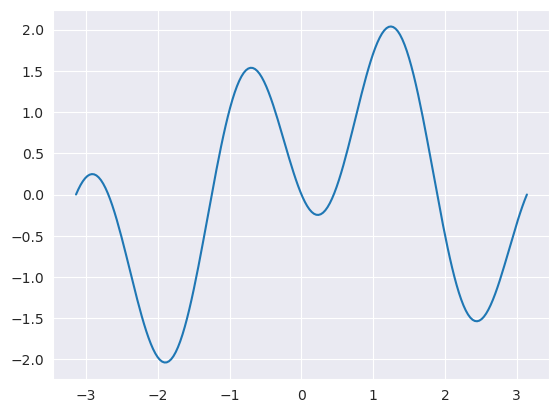

In [7]:
plt.plot(x,y)
plt.show()